First 5 rows:
    CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              

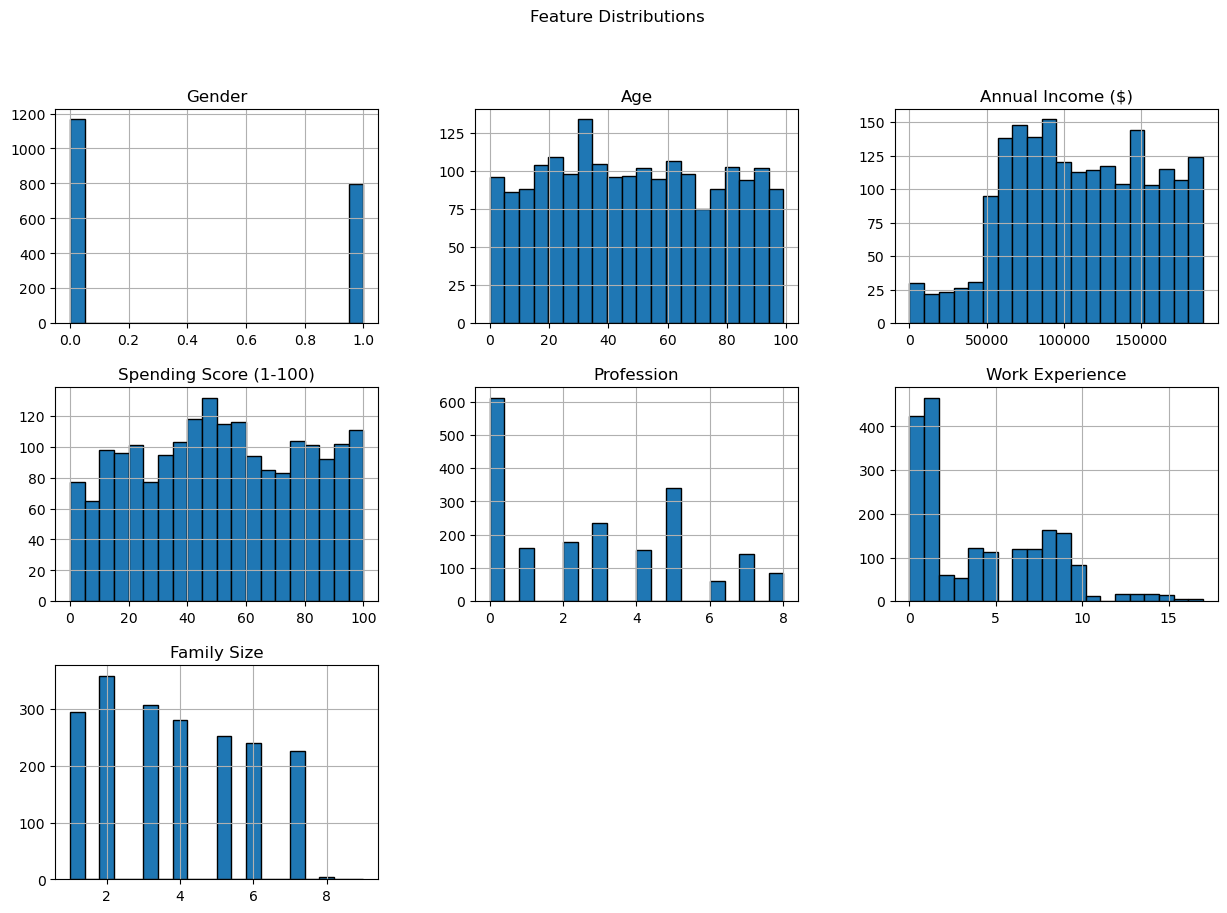

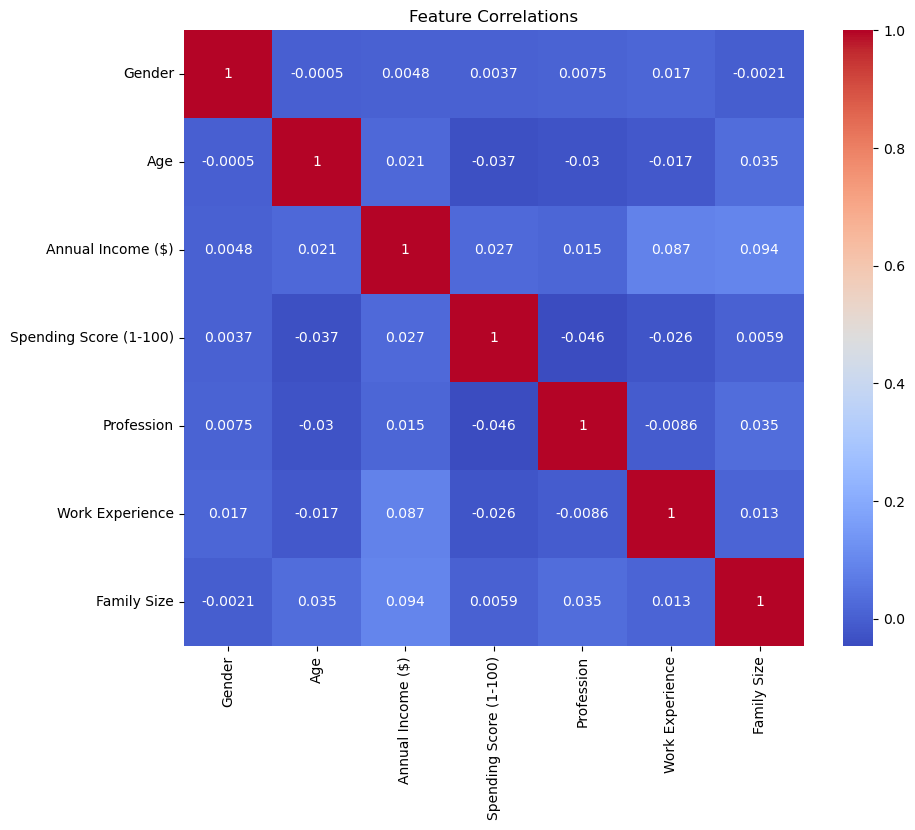

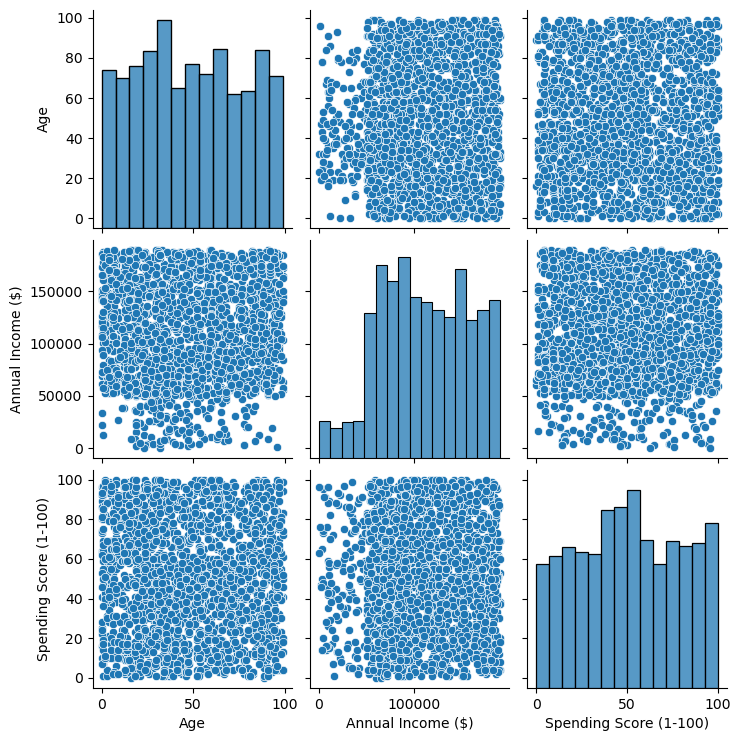

c:\Users\Sanyam\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\Sanyam\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\Sanyam\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\Sanyam\miniconda3\envs\dsi_participant\lib\site-packages\s

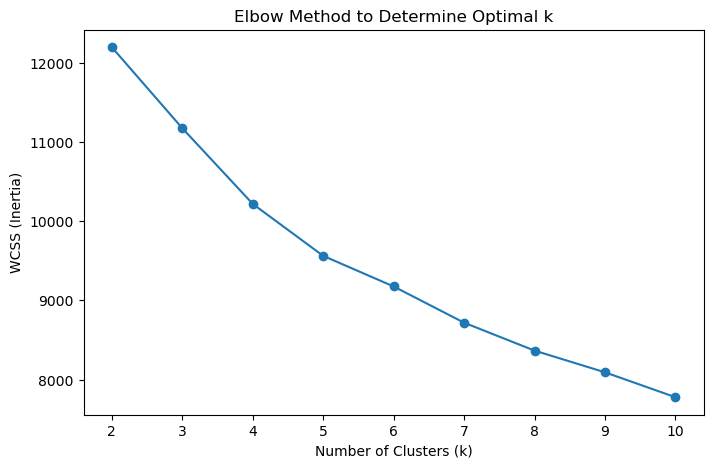

c:\Users\Sanyam\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score for k=5: 0.125


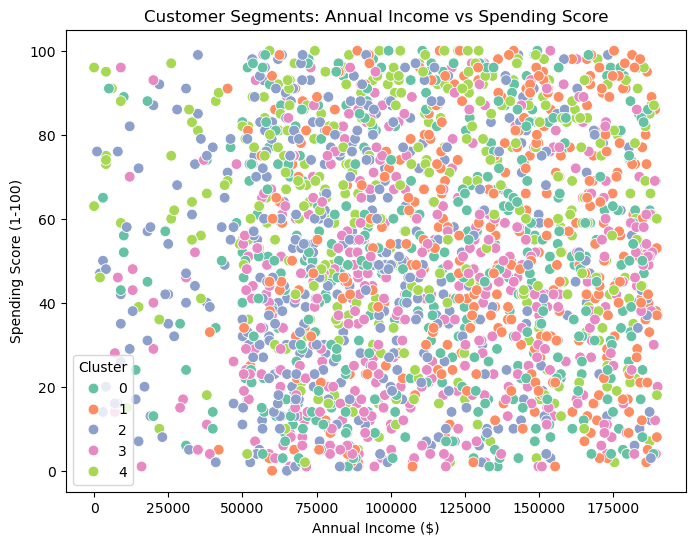

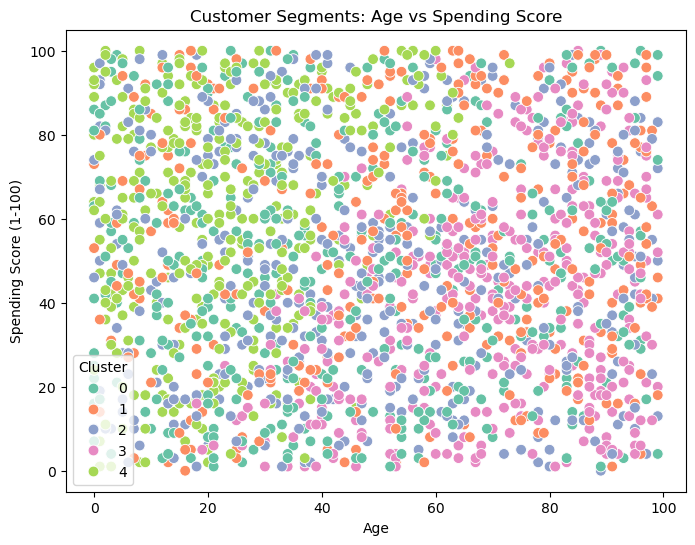

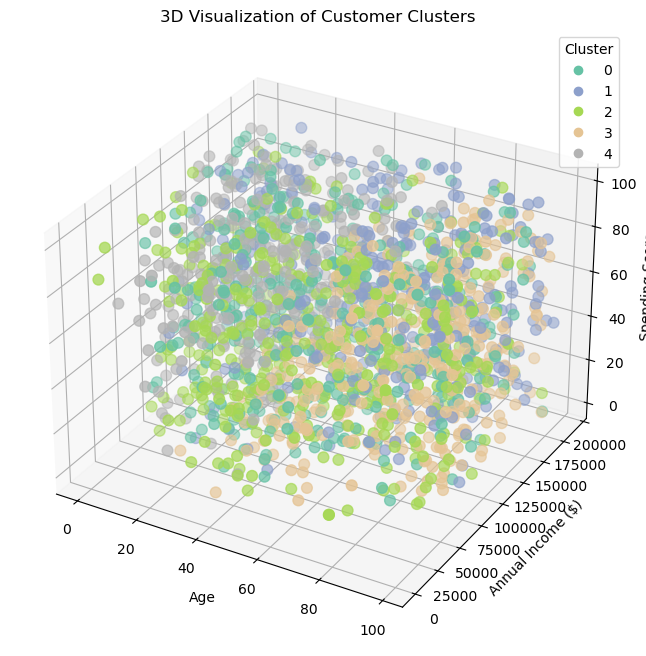

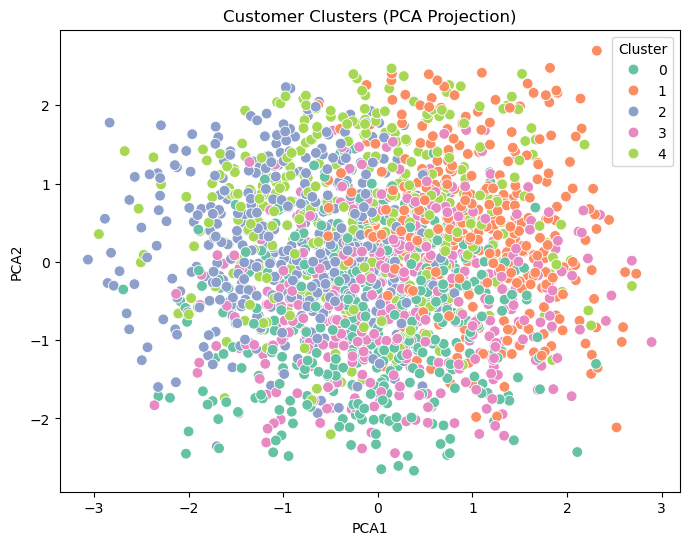


Cluster Summary (mean values):
            Gender        Age  Annual Income ($)  Spending Score (1-100)  \
Cluster                                                                   
0        0.000000  44.457627      114660.314770               49.743341   
1        0.060345  54.916667      133691.741379               54.439655   
2        0.002353  48.962353       88611.117647               49.268235   
3        1.000000  69.828916      111125.062651               42.313253   
4        0.994505  24.225275      109078.013736               61.489011   

         Profession  Work Experience  Family Size  
Cluster                                            
0          5.467312         2.723971     3.699758  
1          1.896552         8.339080     4.807471  
2          0.891765         2.167059     3.054118  
3          3.019277         3.390361     4.086747  
4          2.780220         4.634615     3.263736  


In [1]:
# ------------------------------
# Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# ------------------------------
# Load Dataset
# ------------------------------
file_path = r"C:\Users\Sanyam\Project_work\DSI_2\data\Customers.csv"
df = pd.read_csv(file_path)

# ------------------------------
# Inspect the data
# ------------------------------
print("First 5 rows:\n", df.head())
print("\nData Info:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# ------------------------------
# Data Cleaning
# ------------------------------
# Drop duplicate rows if any
df = df.drop_duplicates()

# Handle missing values (if any)
# For simplicity, drop rows with missing values
df = df.dropna()

# ------------------------------
# Encode Categorical Features
# ------------------------------
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0

le_profession = LabelEncoder()
df['Profession'] = le_profession.fit_transform(df['Profession'])

# ------------------------------
# Feature Selection & Scaling
# ------------------------------
features = ['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
            'Profession', 'Work Experience', 'Family Size']

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# Exploratory Data Analysis (EDA)
# ------------------------------
# Histograms
df[features].hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

# Pairplot for selected features
sns.pairplot(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])
plt.show()

# ------------------------------
# Determine Optimal Clusters (Elbow Method)
# ------------------------------
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# ------------------------------
# K-Means Clustering
# ------------------------------
optimal_k = 5  # choose based on Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {sil_score:.3f}")

# ------------------------------
# Cluster Visualization
# ------------------------------
# 2D Scatterplot (Annual Income vs Spending Score)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income ($)', y='Spending Score (1-100)',
    hue='Cluster', palette='Set2', data=df, s=60
)
plt.title("Customer Segments: Annual Income vs Spending Score")
plt.show()

# 2D Scatterplot (Age vs Spending Score)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age', y='Spending Score (1-100)',
    hue='Cluster', palette='Set2', data=df, s=60
)
plt.title("Customer Segments: Age vs Spending Score")
plt.show()

# 3D Scatterplot (optional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['Age'], df['Annual Income ($)'], df['Spending Score (1-100)'],
    c=df['Cluster'], cmap='Set2', s=60
)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income ($)")
ax.set_zlabel("Spending Score")
plt.title("3D Visualization of Customer Clusters")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

# ------------------------------
# PCA Visualization (Optional)
# ------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster', palette='Set2', data=df, s=60
)
plt.title("Customer Clusters (PCA Projection)")
plt.show()

# ------------------------------
# Cluster Summary
# ------------------------------
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Summary (mean values):\n", cluster_summary)
